<a href="https://colab.research.google.com/github/kovalskj/coronavirus_analysis/blob/master/KoronaScience_raport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=f01c8bcb34493c914570534d69b06dedbc2b8ff8dc451b40cbad70620a65296f
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [0]:
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression

import pandas as pd
import datetime
import numpy as np

url = f"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/a9f182afe873ce7e65d2307fcf91013c23a4556c" \
      f"/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"

confirmed_cases = pd.read_csv(url, error_bad_lines=False)

stock_names = {'US' : '^GSPC',
               'Mexico' : '^MXX',
               'United Kingdom' : '^RUT',
               'China' : '^HSI',
               'Japan' : '^N225',
               'Russia' : 'IMOEX.ME',
               'Singapore' : '^STI',
               'Belgium' : '^BFX',
               'Indonesia' : '^JKSE',
               'France' : '^FCHI'}

In [0]:
def get_country_stock(country, date):

  stock_data = yf.download(stock_names[country], f'2019-8-20', date.strftime('%Y-%m-%d'))
  closing_price = np.array(stock_data.Close.tolist())

  data_size = len(closing_price)
  pre_size = 126

  x_range = np.array(range(data_size))
  x_base1 = x_range[:pre_size].reshape(-1,1)
  x_base2 = x_range[pre_size-1:].reshape(-1,1)

  model1 = LinearRegression().fit(x_base1, closing_price[0:pre_size])
  a1 = model1.coef_[0]
  b1 = model1.intercept_
  y_linear1 = x_range[:pre_size]*a1 + b1

  model2 = LinearRegression().fit(x_base2, closing_price[pre_size-1:])
  a2 = model2.coef_[0]
  b2 = model2.intercept_
  y_linear2 = x_range[pre_size-1:]*a2 + b2
  

  plt.plot(x_range, closing_price)
  plt.plot(x_range[:pre_size], y_linear1)
  plt.plot(x_range[pre_size-1:], y_linear2)
  plt.axvline(126, 0, closing_price[126], color = 'r')

  plt.title(country)
  plt.legend(["Ceny rzeczywiste", "Tendencja przed 20 lutego", "Tendencja po 20 kwietnia"])
  plt.show()

  return [a1, b1, a2, b2]

[*********************100%***********************]  1 of 1 completed


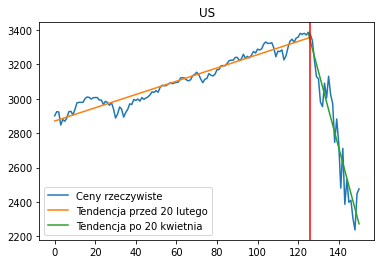

[*********************100%***********************]  1 of 1 completed


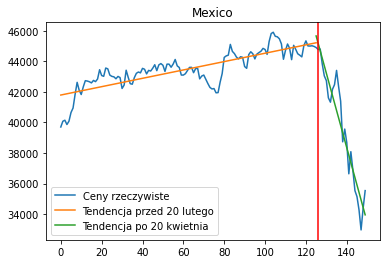

[*********************100%***********************]  1 of 1 completed


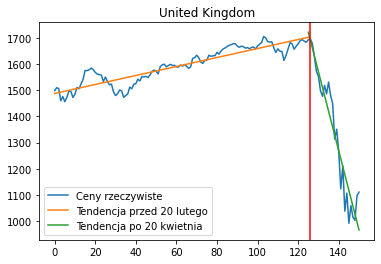

[*********************100%***********************]  1 of 1 completed


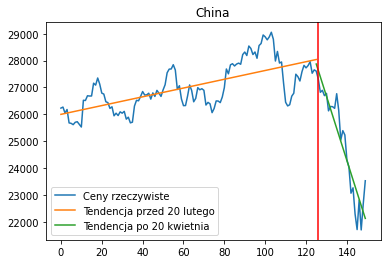

[*********************100%***********************]  1 of 1 completed


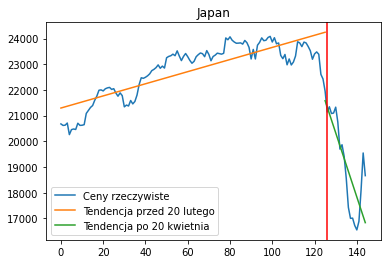

[*********************100%***********************]  1 of 1 completed


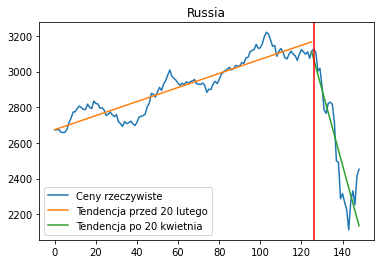

[*********************100%***********************]  1 of 1 completed


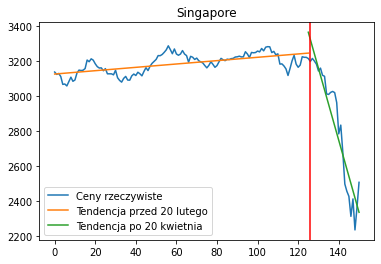

[*********************100%***********************]  1 of 1 completed


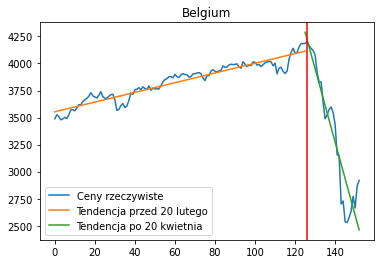

[*********************100%***********************]  1 of 1 completed


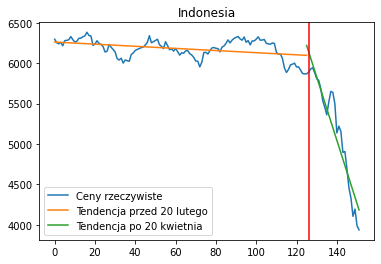

[*********************100%***********************]  1 of 1 completed


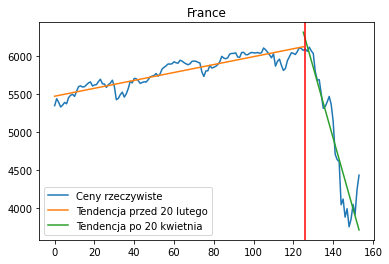

{'US': [3.8577205764318534, 2870.1446767396264, -44.24634448450852, 8909.660039396364], 'Mexico': [27.365289065429337, 41792.77012785511, -487.8762379807691, 106645.71257211536], 'United Kingdom': [1.7194167424628566, 1487.5651023358407, -30.239403232672263, 5501.643326196914], 'China': [16.334906332021003, 25998.892759010592, -239.49280198317297, 57809.590824819694], 'Japan': [23.591993795697423, 21295.468781246094, -249.69575452302635, 52791.77204975329], 'Russia': [3.9395526142728268, 2674.0086725609494, -42.3391599439538, 8402.056990064539], 'Singapore': [0.9573145153730785, 3124.4488719000456, -41.170096821581176, 8509.640622913324], 'Belgium': [4.487178507715834, 3553.1625299462075, -67.67558595086292, 12748.036506105786], 'Indonesia': [-1.3182854770106864, 6261.010952122196, -78.2427409152263, 15999.974492322643], 'France': [5.191250559500378, 5468.172932851167, -92.63426832377618, 17886.778834451008]}


In [5]:
today = datetime.date(2020, 3, 26)

stock_tendencies = {}

for country in stock_names:
  stock_tendencies[country] = get_country_stock(country, today)

print(stock_tendencies)

In [6]:
df_tend = [[], [], []]
for country in stock_tendencies:
    df_tend[0].append(stock_tendencies[country][0])
    df_tend[1].append(stock_tendencies[country][2])
    df_tend[2].append(stock_tendencies[country][0] - stock_tendencies[country][2])

stock_df = pd.DataFrame({"Country": list(stock_tendencies.keys()), "PreCrash": df_tend[0], "AfterCrash": df_tend[1], "Change": df_tend[2]})
stock_df.sort_values(by = ["Change"], ascending = False)

,Country,PreCrash,AfterCrash,Change
1,Mexico,27.365289,-487.876238,515.241527
4,Japan,23.591994,-249.695755,273.287748
3,China,16.334906,-239.492802,255.827708
9,France,5.191251,-92.634268,97.825519
8,Indonesia,-1.318285,-78.242741,76.924455
7,Belgium,4.487179,-67.675586,72.162764
0,US,3.857721,-44.246344,48.104065
5,Russia,3.939553,-42.339160,46.278713
6,Singapore,0.957315,-41.170097,42.127411
2,United Kingdom,1.719417,-30.239403,31.958820


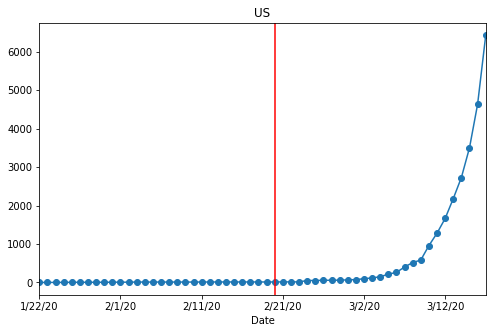

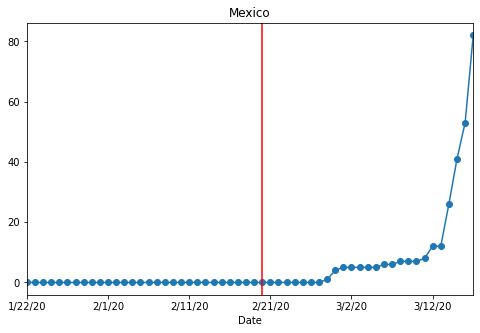

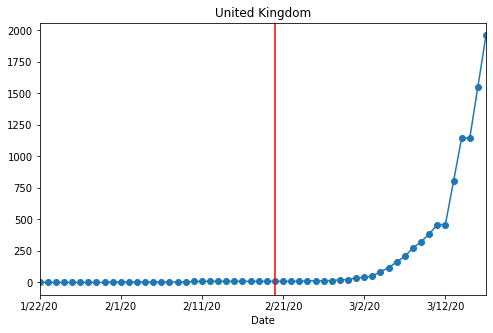

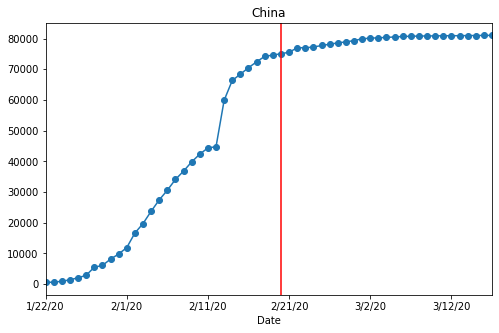

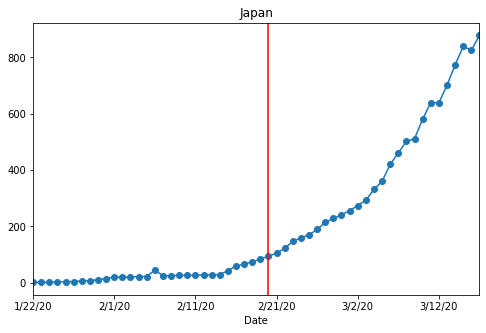

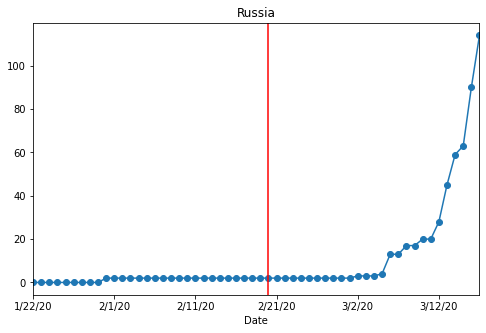

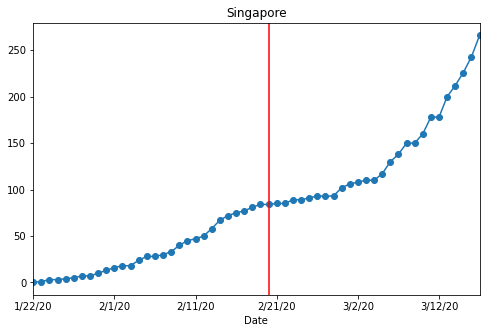

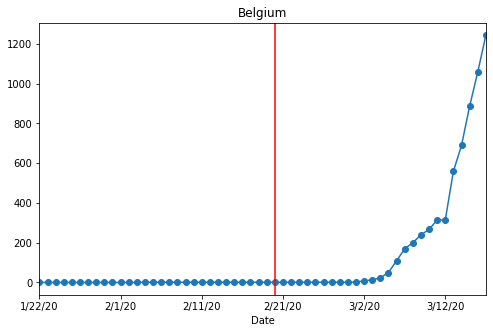

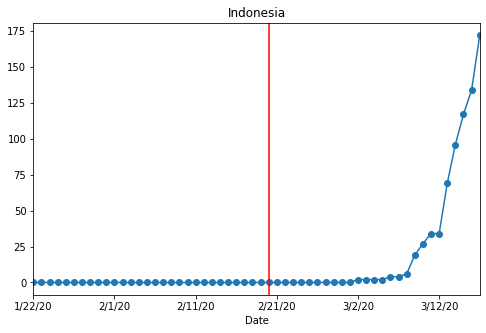

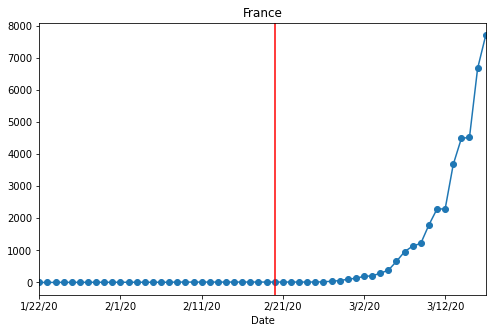

In [10]:
def country_cases(country):
    grouped_cases = confirmed_cases.loc[confirmed_cases["Country/Region"]==country].groupby("Country/Region").sum()
    clean_cases = grouped_cases.melt(id_vars=['Lat', 'Long'],value_name='Cases',var_name='Date').set_index(['Date'])
    clean_cases.Cases.plot(figsize=(8,5), marker='o', title=country)
    plt.axvline(29, 0, 80000, color = 'r')
    plt.show()

for country in stock_names:
  country_cases(country)

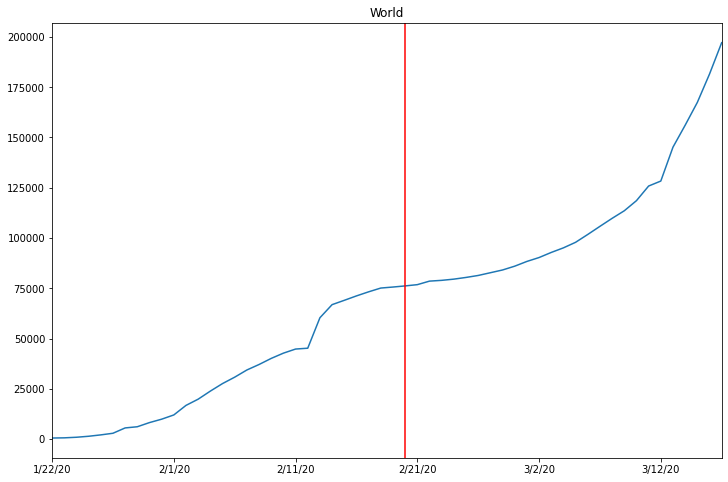

In [14]:
confirmed_cases.sum(axis = 0, skipna = True)[2:].plot(figsize=(12,8), title="World")
plt.axvline(29, 0, 80000, color = 'r')
plt.show()

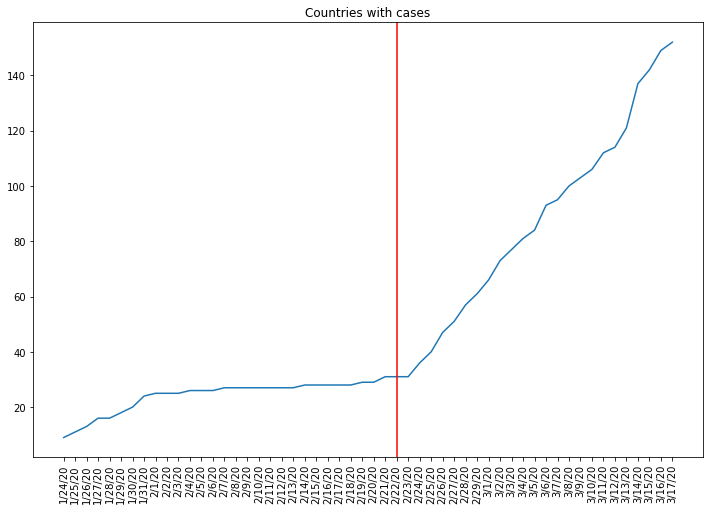

In [16]:
countries_with_cases = []
grouped_cases = confirmed_cases.groupby("Country/Region").sum()
dates = list(grouped_cases.columns.values[4:])

for date in dates:
  series = grouped_cases.apply(lambda x: True if x[date] != 0 else False , axis=1)
  countries_with_cases.append(len(series[series == True].index))

plt.figure(figsize=(12, 8))
plt.plot(dates, countries_with_cases)
plt.axvline(29, 0, 80000, color = 'r')
plt.xticks(dates, dates, rotation='vertical')
plt.title("Countries with cases")
plt.show()